In [31]:
import pandas as pd
import numpy as np
import datetime
import math
from math import *
import matplotlib.pyplot as plt


In [32]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/My Drive/Colab Notebooks

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/Colab Notebooks


In [33]:
df = pd.read_csv("Cases.csv")
df['conf_cases'] = df['conf_cases'].fillna(0)
df['prob_cases'] = df['prob_cases'].fillna(0)
df['pnew_case'] = df['pnew_case'].fillna(0)
df['conf_death'] = df['conf_death'].fillna(0)
df['prob_death'] = df['prob_death'].fillna(0)
df['pnew_death'] = df['pnew_death'].fillna(0)

In [34]:
df_mo = df[df['state'] == "MO"]
df_mi = df[df['state'] == "MI"]
df_mo["submission_date"] = pd.to_datetime(df_mo["submission_date"])
df_mi["submission_date"] = pd.to_datetime(df_mi["submission_date"])
df_mi.sort_values(by='submission_date', inplace=True)
df_mo.sort_values(by='submission_date', inplace=True)
df_mo.fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the cav

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
5693,2020-01-22,MO,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,03/26/2020 04:22:39 PM,Not agree,Not agree
5763,2020-01-23,MO,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,03/26/2020 04:22:39 PM,Not agree,Not agree
2927,2020-01-24,MO,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,03/26/2020 04:22:39 PM,Not agree,Not agree
7930,2020-01-25,MO,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,03/26/2020 04:22:39 PM,Not agree,Not agree
41977,2020-01-26,MO,0,0.0,0.0,0,0.0,0,0.0,0.0,0,0.0,03/26/2020 04:22:39 PM,Not agree,Not agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39890,2022-05-07,MO,1428117,0.0,0.0,0,0.0,20382,0.0,0.0,0,0.0,05/09/2022 01:14:40 PM,Not agree,Not agree
41451,2022-05-08,MO,1428117,0.0,0.0,0,0.0,20382,0.0,0.0,0,0.0,05/09/2022 02:22:50 PM,Not agree,Not agree
8100,2022-05-09,MO,1428117,0.0,0.0,0,0.0,20382,0.0,0.0,0,0.0,05/10/2022 01:23:16 PM,Not agree,Not agree
7720,2022-05-10,MO,1428117,0.0,0.0,0,0.0,20382,0.0,0.0,0,0.0,05/11/2022 01:51:16 PM,Not agree,Not agree


In [35]:

frames = [df_mi, df_mo]
total_data = pd.concat(frames)
# total_data["submission_date"] = pd.to_datetime(total_data["submission_date"])
# total_data.sort_values(by=['state', 'submission_date'], inplace=True)
total_data.to_csv('out.csv', encoding='utf-8', index=False)
print(total_data)
# print(total_data.dtypes)
# print("\nGiving a space")
print(total_data.iloc[0])
print("Starting and ending date is : \n" + str(total_data['submission_date'].min()) + "Ending is : " + str(total_data['submission_date'].max()))

      submission_date state  tot_cases  conf_cases  prob_cases  new_case  \
8029       2020-01-22    MI          0         0.0         0.0         0   
36128      2020-01-23    MI          0         0.0         0.0         0   
7482       2020-01-24    MI          0         0.0         0.0         0   
40637      2020-01-25    MI          0         0.0         0.0         0   
37889      2020-01-26    MI          0         0.0         0.0         0   
...               ...   ...        ...         ...         ...       ...   
39890      2022-05-07    MO    1428117         0.0         0.0         0   
41451      2022-05-08    MO    1428117         0.0         0.0         0   
8100       2022-05-09    MO    1428117         0.0         0.0         0   
7720       2022-05-10    MO    1428117         0.0         0.0         0   
43665      2022-05-11    MO    1428117         0.0         0.0         0   

       pnew_case  tot_death  conf_death  prob_death  new_death  pnew_death  \
8029     

In [76]:
def iqr(x):
    x = sorted(x)
    n = len(x)
    t = n / 4
    Q1 = x[np.int(np.ceil(t))]
    t = 3 * (n / 4)
    Q3 = x[np.int(np.ceil(t))]

    return Q3 - Q1, Q1, Q3


def outliers(x, column, a, b):
    if (a < 0): a = 0
    cond = (x[column] < a) | (x[column] > b)
    outlier = x.loc[cond]

    return outlier



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Depr

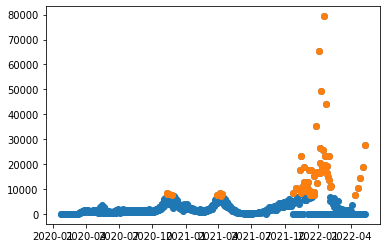

66


In [70]:
column = 'new_case'
iqr, q1, q3 = iqr(df_mi[column])
threshold_min = q1 - 1.5 * iqr
threshold_max = q3 + 1.5 * iqr

outlier_data = outliers(df_mi, column, threshold_min, threshold_max)
plt.scatter(df_mi['submission_date'], df_mi[column])
plt.scatter(outlier_data['submission_date'], outlier_data[column])
plt.show()
print(len(outlier_data))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Depr

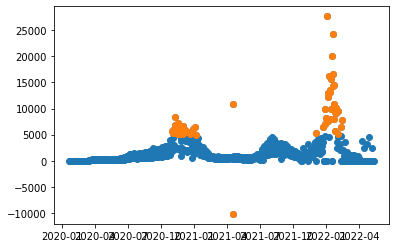

58


In [73]:
column = 'new_case'
iqr, q1, q3 = iqr(df_mo[column])
threshold_min = q1 - 1.5 * iqr
threshold_max = q3 + 1.5 * iqr

outlier_data = outliers(df_mo, column, threshold_min, threshold_max)
plt.scatter(df_mo['submission_date'], df_mo[column])
plt.scatter(outlier_data['submission_date'], outlier_data[column])
plt.show()
print(len(outlier_data))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Depr

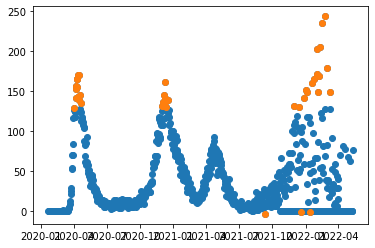

In [75]:
column = 'new_death'
iqr, q1, q3 = iqr(df_mi[column])
threshold_min = q1 - 1.5 * iqr
threshold_max = q3 + 1.5 * iqr

outlier_data = outliers(df_mi, column, threshold_min, threshold_max)
plt.scatter(df_mi['submission_date'], df_mi[column])
plt.scatter(outlier_data['submission_date'], outlier_data[column])
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Depr

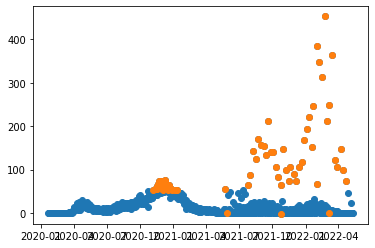

In [77]:
column = 'new_death'
iqr, q1, q3 = iqr(df_mo[column])
threshold_min = q1 - 1.5 * iqr
threshold_max = q3 + 1.5 * iqr

outlier_data = outliers(df_mo, column, threshold_min, threshold_max)
plt.scatter(df_mo['submission_date'], df_mo[column])
plt.scatter(outlier_data['submission_date'], outlier_data[column])
plt.show()